**Train SVM Model**

1. import Python packages and training data

In [1]:
# adding required libraries
import pandas as pd
import numpy as np

In [2]:
# read data from file
df = pd.read_csv('../data/raw/NBA_train.csv')

2. Prepare the dataset for model training

In [3]:
# split data into feature and target
x = df.drop(['Id', 'TARGET_5Yrs'], axis=1)# drop the ID field
y = df[['TARGET_5Yrs']]
y.head()

,TARGET_5Yrs
0,1
1,1
2,1
3,1
4,1


In [4]:
# split the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [5]:
# check the outcome of the splitted data
y_data.shape

(6400, 1)

In [6]:
y_data.value_counts(normalize=True)

TARGET_5Yrs
1              0.832187
0              0.167813
Name: proportion, dtype: float64

3. Set up baseline model

In [7]:
# find the most occuring value and use it as base model
y_mode = y_data.mode()
y_shape = (len(x_data), 1)
y_base = np.full(y_shape, y_mode)

In [8]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data, y_base)

0.8321875

4. Train Decision Tree model

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=8)
tree_1.fit(x_data, y_data)
print(tree_1.score(x_data, y_data))
print(tree_1.score(x_test, y_test))

1.0
0.75375


In [33]:
for i in [5,10,15,20,25,30]:
    tree_split_1 = DecisionTreeClassifier(random_state=8, min_samples_split=i,max_depth=8).fit(x_data, y_data)
    print(tree_split_1.score(x_data, y_data))
    print(tree_split_1.score(x_test, y_test))
    print('_________')

0.86125
0.821875
_________
0.85890625
0.82
_________
0.8575
0.820625
_________
0.855
0.825
_________
0.8534375
0.81875
_________
0.85296875
0.821875
_________


In [34]:
tree_split_2 = DecisionTreeClassifier(random_state=8, min_samples_split=20, max_depth=8).fit(x_data, y_data)
print(tree_split_2.score(x_data, y_data))
print(tree_split_2.score(x_test, y_test))

0.855
0.825


5. Exam the model

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

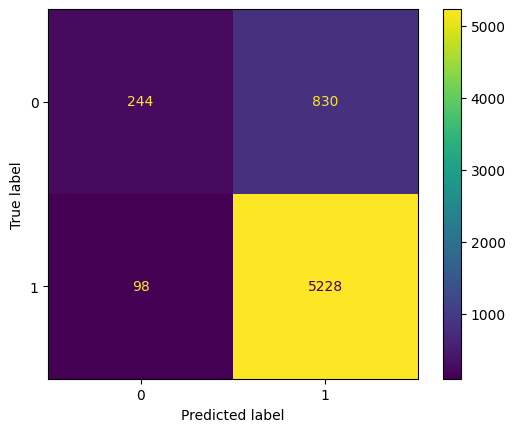

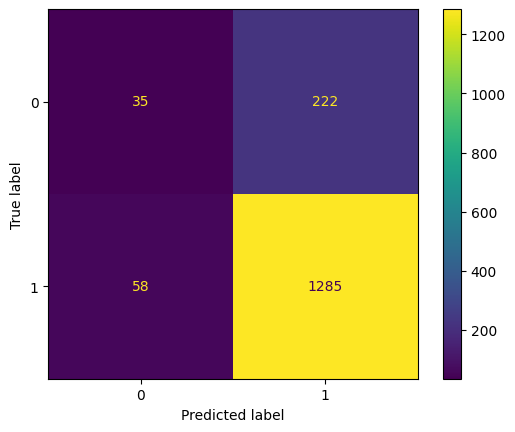

In [35]:
ConfusionMatrixDisplay.from_estimator(tree_split_2, x_data, y_data)
ConfusionMatrixDisplay.from_estimator(tree_split_2, x_test, y_test)

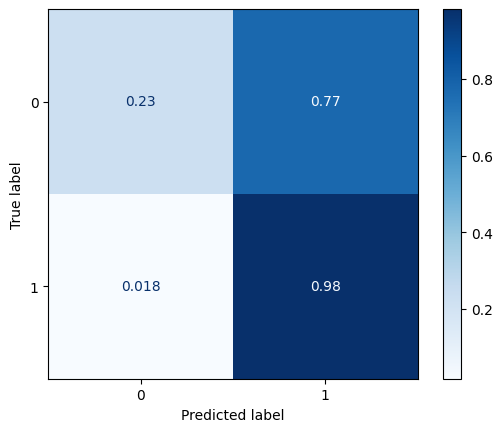

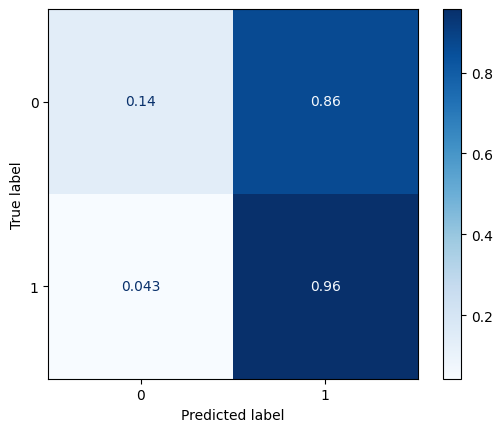

In [36]:
ConfusionMatrixDisplay.from_estimator(tree_split_2, x_data, y_data, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_split_2, x_test, y_test, cmap=plt.cm.Blues, normalize='true')

6. Conclusion
This is a better model compare to SVM model, but the accuracy is not high enough. 